# Contributor's Details: Prabhakar Yadav / Varshith V
# Dataset Utilized: 311_Customer_Service_Requests_Analysis
# Libraries and Modules Applied: numpy, pandas, matplotlib, seaborn, datetime, scipy


# <u>Solution :

# 1. Importing the Dataset and doing Data Preprocessing on the dataset

In [3]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
import datetime

from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [2]:
# reading the dataset
# Note: Our Dataset is very large so setting low_memory to false
dataset = pd.read_csv('NYC311data.csv', low_memory = False)

In [4]:
# View the top 5 elements of the dataset
dataset.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/15 23:59,1/1/16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/15 23:59,1/1/16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/15 23:59,1/1/16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/15 23:57,1/1/16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/15 23:56,1/1/16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
# shape of the dataset
dataset.shape

(300698, 53)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

#### Our dataset contains numerous columns, many of which are not necessary for our analysis. Therefore, I will eliminate columns that exhibit a substantial amount of missing values, as well as those that are not relevant to our objectives.

In [7]:
# all columns in dataset
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

- Columns with most of its values as null are dropped
- Agency and Agency Name are more or less same, so I am dropping Agency Name
- Dropping other unnecessary columns like Location, Incident Adrress, Street Name, X Coordinate (State Plane), Y Coordinate (State Plane)  as we are already considering LATITUDE and LONGITUDE
- Dropping other unnecessary columns

In [ ]:
# getting insight of all columns using ydata_profiling
!pip install pandas_profiling
!pip install ydata_profiling
from ydata_profiling import ProfileReport

In [8]:
# Define keywords to filter
missing_value_columns = ['Bridge Highway Name','Bridge Highway Direction','Taxi Pick Up Location', 'Taxi Company Borough', 'Vehicle Type' , 'School or Citywide Complaint','School Not Found','School Zip','School State','School City','School Address','School Phone Number','School Code','School Region','School Number','School Name','Park Facility Name','Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Terminal Name','Ferry Direction']


# Drop identified columns
# dataset = dataset.drop(missing_value_columns, axis=1)

for column in missing_value_columns:
    if column in dataset.columns:
        dataset = dataset.drop(column, axis=1)


In [9]:
# many redundant location columns needs to be dropped
missing_value_columns2 = ['Location', 'X Coordinate (State Plane)','Y Coordinate (State Plane)']

for column in missing_value_columns2:
    if column in dataset.columns:
        dataset = dataset.drop(column, axis=1)


In [10]:
# since unique key does not play significant role it can be removed, also agency is same for all NYPD

missing_value_columns = ['Agency Name', 'Street Name']
# 'Agency', 'Unique Key'
for column in missing_value_columns:
    if column in dataset.columns:
        dataset = dataset.drop(column, axis=1)


- ### Now check for null values, data type of the columns etc.

In [11]:
# checking the info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Complaint Type                  300698 non-null  object 
 5   Descriptor                      294784 non-null  object 
 6   Location Type                   300567 non-null  object 
 7   Incident Zip                    298083 non-null  float64
 8   Incident Address                256288 non-null  object 
 9   Cross Street 1                  251419 non-null  object 
 10  Cross Street 2                  250919 non-null  object 
 11  Intersection Street 1           43858 non-null   object 
 12  Intersection Str

In [12]:
# checking the number of null values in the columns
dataset.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough                                0
Park Borough                           0
Latitude        

In [13]:
# other address columns with 85% null values 

missing_value_columns3 = ['Address Type','Intersection Street 1', 'Intersection Street 2', 'Landmark', 'Street Name']

for column in missing_value_columns3:
    if column in dataset.columns:
        dataset = dataset.drop(column, axis=1)

In [14]:
# choosing the closed cases only to eliminate the null values

dataset = dataset[dataset['Status'] == 'Closed']

In [15]:
dataset.isnull().sum()

Unique Key                            0
Created Date                          0
Closed Date                           0
Agency                                0
Complaint Type                        0
Descriptor                         5903
Location Type                        65
Incident Zip                        507
Incident Address                  44386
Cross Street 1                    47552
Cross Street 2                    47642
City                                506
Facility Type                        14
Status                                0
Due Date                              0
Resolution Description                0
Resolution Action Updated Date        2
Community Board                       0
Borough                               0
Park Borough                          0
Latitude                           1432
Longitude                          1432
dtype: int64

In [16]:
# since all the cases are of closed cases we can now drop the column Status as every value of its data are same
dataset = dataset.drop(['Status'], axis = 1)

In [17]:
dataset.shape

(298471, 21)

In [18]:
# out of the remaining columns only Descriptor, Latitude and Longitude has over 1k null values
dataset = dataset[(dataset['Descriptor'].notnull()) & (dataset['Latitude'].notnull()) &(dataset['Longitude'].notnull())]

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291204 entries, 0 to 300697
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      291204 non-null  int64  
 1   Created Date                    291204 non-null  object 
 2   Closed Date                     291204 non-null  object 
 3   Agency                          291204 non-null  object 
 4   Complaint Type                  291204 non-null  object 
 5   Descriptor                      291204 non-null  object 
 6   Location Type                   291149 non-null  object 
 7   Incident Zip                    291164 non-null  float64
 8   Incident Address                248912 non-null  object 
 9   Cross Street 1                  246076 non-null  object 
 10  Cross Street 2                  246073 non-null  object 
 11  City                            291164 non-null  object 
 12  Facility Type        

In [19]:
# rechecking remaining null values
dataset.isnull().sum()

Unique Key                            0
Created Date                          0
Closed Date                           0
Agency                                0
Complaint Type                        0
Descriptor                            0
Location Type                        55
Incident Zip                         40
Incident Address                  42292
Cross Street 1                    45128
Cross Street 2                    45131
City                                 40
Facility Type                         4
Due Date                              0
Resolution Description                0
Resolution Action Updated Date        2
Community Board                       0
Borough                               0
Park Borough                          0
Latitude                              0
Longitude                             0
dtype: int64

In [20]:
# still there are few null values in our dataset. we will remove them
# Count the number of entries with non-null 'Location Type', 'Incident Zip', and 'City' columns
count_non_null = dataset[(dataset['Location Type'].notnull()) & 
                         (dataset['Incident Zip'].notnull()) & 
                         (dataset['City'].notnull())].shape[0]

print(count_non_null)

# rechecking for null values
dataset.isnull().sum()

291107


Unique Key                            0
Created Date                          0
Closed Date                           0
Agency                                0
Complaint Type                        0
Descriptor                            0
Location Type                        55
Incident Zip                         40
Incident Address                  42292
Cross Street 1                    45128
Cross Street 2                    45131
City                                 40
Facility Type                         4
Due Date                              0
Resolution Description                0
Resolution Action Updated Date        2
Community Board                       0
Borough                               0
Park Borough                          0
Latitude                              0
Longitude                             0
dtype: int64

# So all Null values are removed from our dataset

In [21]:
# checking the shape our datset
dataset.shape

(291204, 21)

In [22]:
dataset_copy1 = dataset

# 2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)

In [23]:
# converting 'Created Date' and 'Closed Date' to datetime datatype

cols = ['Created Date', 'Closed Date']
for col in cols:
    dataset[col] = pd.to_datetime(dataset[col],infer_datetime_format=True)
    
# creating a new column Request_Closing_Time
dataset['Request_Closing_Time'] = dataset[cols[1]] - dataset[cols[0]]

# viewing the info to see the data types
dataset.info()

/var/folders/c6/_6n15nws7bd22zj8h25hdybw0000gn/T/ipykernel_76877/2242377464.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset[col] = pd.to_datetime(dataset[col],infer_datetime_format=True)
/var/folders/c6/_6n15nws7bd22zj8h25hdybw0000gn/T/ipykernel_76877/2242377464.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset[col] = pd.to_datetime(dataset[col],infer_datetime_format=True)
/var/folders/c6/_6n15nws7bd22zj8h25hdybw0000gn/T/ipykernel_76877/2242377464.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://p

<class 'pandas.core.frame.DataFrame'>
Index: 291204 entries, 0 to 300697
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique Key                      291204 non-null  int64          
 1   Created Date                    291204 non-null  datetime64[ns] 
 2   Closed Date                     291204 non-null  datetime64[ns] 
 3   Agency                          291204 non-null  object         
 4   Complaint Type                  291204 non-null  object         
 5   Descriptor                      291204 non-null  object         
 6   Location Type                   291149 non-null  object         
 7   Incident Zip                    291164 non-null  float64        
 8   Incident Address                248912 non-null  object         
 9   Cross Street 1                  246076 non-null  object         
 10  Cross Street 2                  246073 non-null  

# 3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

In [24]:
# applying describe on the dataset
dataset.describe()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291204 entries, 0 to 300697
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique Key                      291204 non-null  int64          
 1   Created Date                    291204 non-null  datetime64[ns] 
 2   Closed Date                     291204 non-null  datetime64[ns] 
 3   Agency                          291204 non-null  object         
 4   Complaint Type                  291204 non-null  object         
 5   Descriptor                      291204 non-null  object         
 6   Location Type                   291149 non-null  object         
 7   Incident Zip                    291164 non-null  float64        
 8   Incident Address                248912 non-null  object         
 9   Cross Street 1                  246076 non-null  object         
 10  Cross Street 2                  246073 non-null  

In [25]:
# viewing the columns
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address',
       'Cross Street 1', 'Cross Street 2', 'City', 'Facility Type', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'Park Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time'],
      dtype='object')

### We will analyse Agency, Complaint Type, Descriptor, Location Type, City, Borough 

In [26]:
# All the complaints are under the same agency
dataset['Agency'].value_counts()


Agency
NYPD    291204
Name: count, dtype: int64

In [27]:
# complaint types
dataset['Complaint Type'].value_counts()

Complaint Type
Blocked Driveway            76697
Illegal Parking             74042
Noise - Street/Sidewalk     47771
Noise - Commercial          35159
Derelict Vehicle            17511
Noise - Vehicle             16870
Animal Abuse                 7745
Traffic                      4471
Noise - Park                 3927
Vending                      3773
Drinking                     1271
Noise - House of Worship      922
Posting Advertisement         647
Disorderly Youth              285
Graffiti                      113
Name: count, dtype: int64

<Axes: title={'center': 'Complaint Types'}, xlabel='Complaint Type', ylabel='Count'>

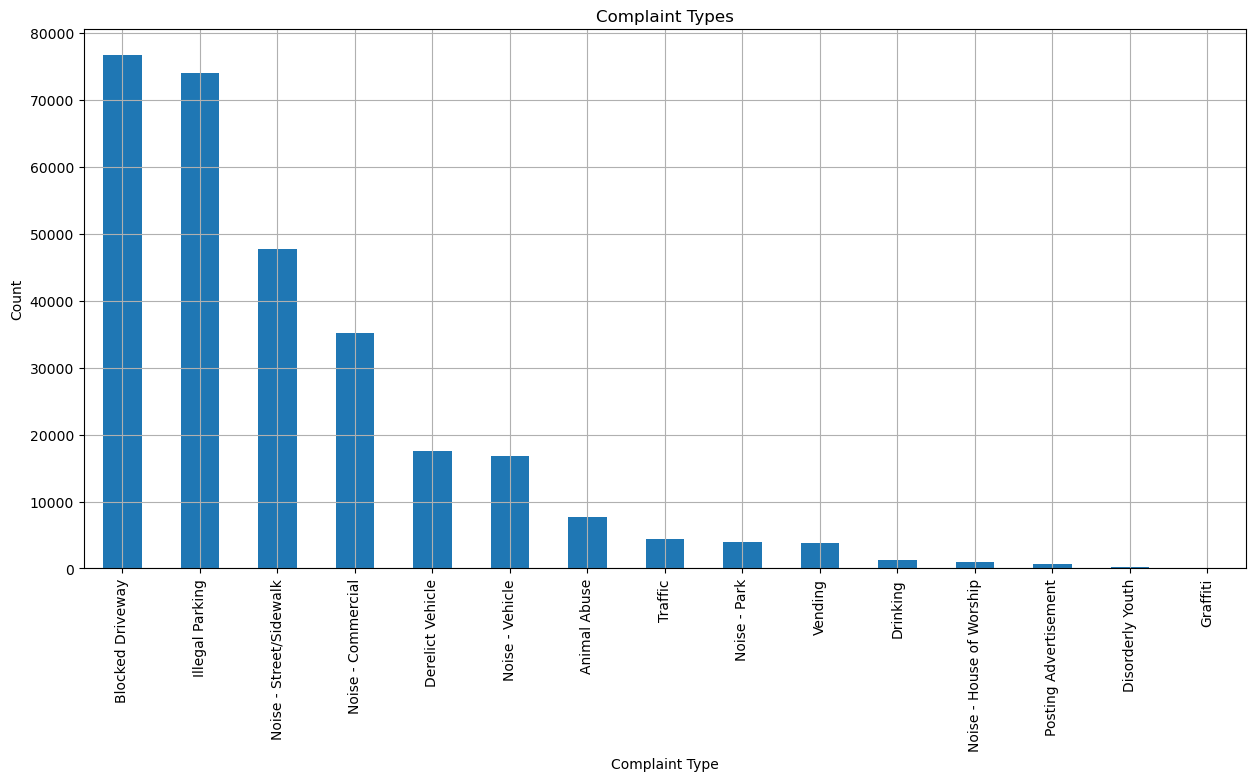

In [28]:
# plotting the complaint types
dataset['Complaint Type'].value_counts().plot(kind = 'bar', figsize=(15, 7), title='Complaint Types', ylabel='Count', grid=True)

- so <b>Blocked Driveway</b> is the Maximum Complaint type followed by Illegal Parking, Noise-Street/Sidewalk, Noise-Commercial

In [29]:
# Descriptors
dataset['Descriptor'].value_counts()

Descriptor
Loud Music/Party                  60477
No Access                         56738
Posted Parking Sign Violation     22112
Loud Talking                      21257
Partial Access                    19959
With License Plate                17511
Blocked Hydrant                   15841
Commercial Overnight Parking      11910
Car/Truck Music                   11115
Blocked Sidewalk                  10931
Double Parked Blocking Traffic     5562
Double Parked Blocking Vehicle     4147
Engine Idling                      4135
Banging/Pounding                   4094
Neglected                          3772
Car/Truck Horn                     3478
Congestion/Gridlock                2741
In Prohibited Area                 2017
Other (complaint details)          1961
Unlicensed                         1756
Overnight Commercial Storage       1747
Unauthorized Bus Layover           1333
Truck Route Violation              1010
In Public                           924
Tortured                     

<Axes: title={'center': 'Top 10 Descriptors'}, ylabel='Descriptor'>

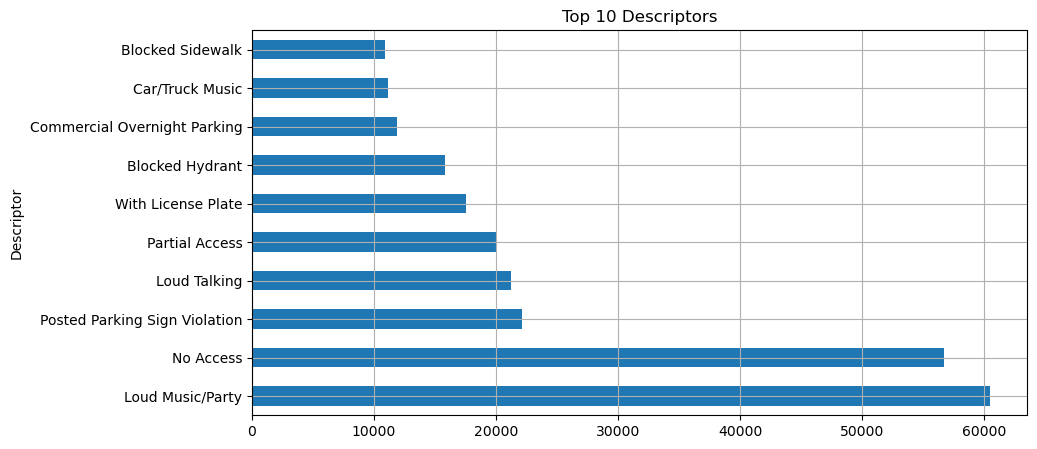

In [30]:
# plotting top 10 Descriptors
dataset['Descriptor'].value_counts().head(10).plot(kind='barh', grid=True, figsize=(10,5), title='Top 10 Descriptors')

- So <b>Loud Music/Party</b> is the <u>maximum</u> descriptor for the complaints followed by No Access, Posted Parking Sign Violation and Loud Taking.

In [31]:
# Top 10 Location Type
dataset['Location Type'].value_counts().head(10)

Location Type
Street/Sidewalk               242792
Store/Commercial               19436
Club/Bar/Restaurant            17173
Residential Building/House      5753
Park/Playground                 4246
House of Worship                 920
Residential Building             226
Highway                          199
Parking Lot                      116
House and Store                   93
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 Location Type'}, ylabel='Location Type'>

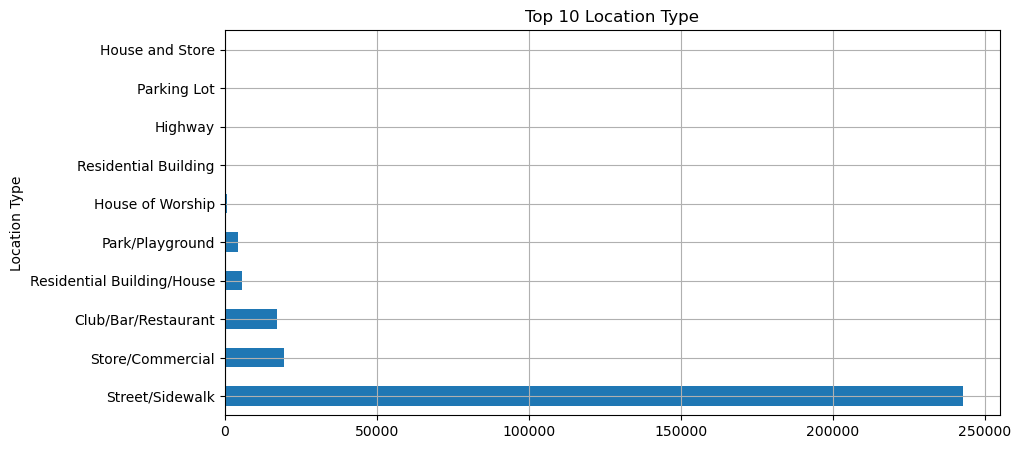

In [32]:
# plotting Top 10 Location Type
dataset['Location Type'].value_counts().head(10).plot(kind='barh', grid=True, figsize=(10, 5), title='Top 10 Location Type')

- So we see that the Location Type of <b>Street/Sidewalk</b> is a lot more than any other members of its category

In [33]:
# City
dataset['City'].value_counts().head(10)

City
BROOKLYN         96881
NEW YORK         61940
BRONX            40223
STATEN ISLAND    12214
JAMAICA           7155
ASTORIA           6254
FLUSHING          5919
RIDGEWOOD         5124
CORONA            4266
WOODSIDE          3494
Name: count, dtype: int64

Text(0.5, 0, 'Complaint Counts')

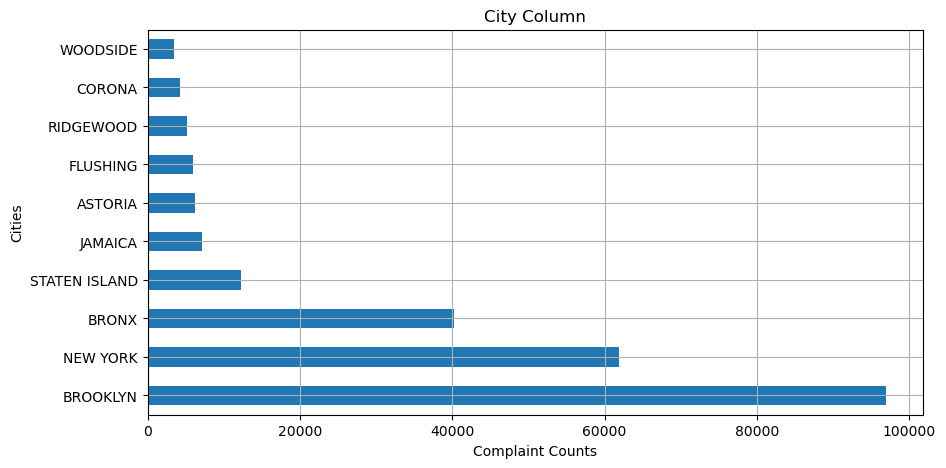

In [34]:
# plotting the cities
dataset['City'].value_counts().head(10).plot(kind='barh', grid=True, figsize=(10, 5), title='City Column', ylabel='Cities')
plt.xlabel('Complaint Counts')

- So most complaints are from <b>BROOKLYN</b> followed New York, Bronx, Staten Island in City wise

Text(0.5, 0, 'Complaint Counts')

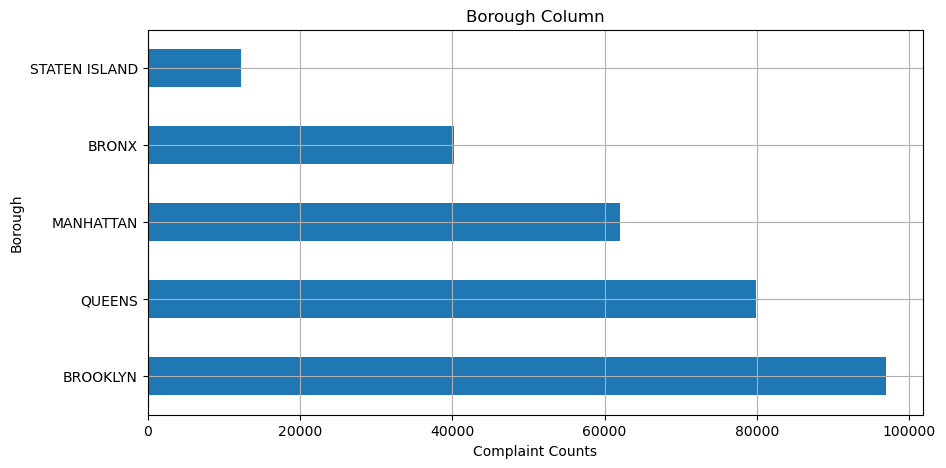

In [35]:
# Borough
dataset['Borough'].value_counts().head(10).plot(kind='barh', grid=True, figsize=(10, 5), title='Borough Column', ylabel='Borough')
plt.xlabel('Complaint Counts')

- So most complaints are from <b>BROOKLYN</b> followed Queens, Manhattan, Bronx and Staten Island in Borough wise

### Till now we only analyse one column. Lets analyse Borough and Complaint Types

- Borough per Complaint Type

In [36]:
# Top Complaints
top_6_complaints = dataset['Complaint Type'].value_counts()[:6].keys()
top_6_complaints

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle', 'Noise - Vehicle'],
      dtype='object', name='Complaint Type')

In [37]:
# Borough per Complaints
borough_complaints = dataset.groupby(['Borough', 'Complaint Type']).size().unstack()
borough_complaints = borough_complaints[top_6_complaints]
borough_complaints

Complaint Type,Blocked Driveway,Illegal Parking,Noise - Street/Sidewalk,Noise - Commercial,Derelict Vehicle,Noise - Vehicle
Borough,,,,,,
BRONX,12741,7831,8864,2431,1949,3385
BROOKLYN,28128,27394,13316,11452,5167,5146
MANHATTAN,2057,11983,20383,14540,530,5375
QUEENS,31630,21951,4392,6058,8102,2608
STATEN ISLAND,2141,4883,816,678,1763,356


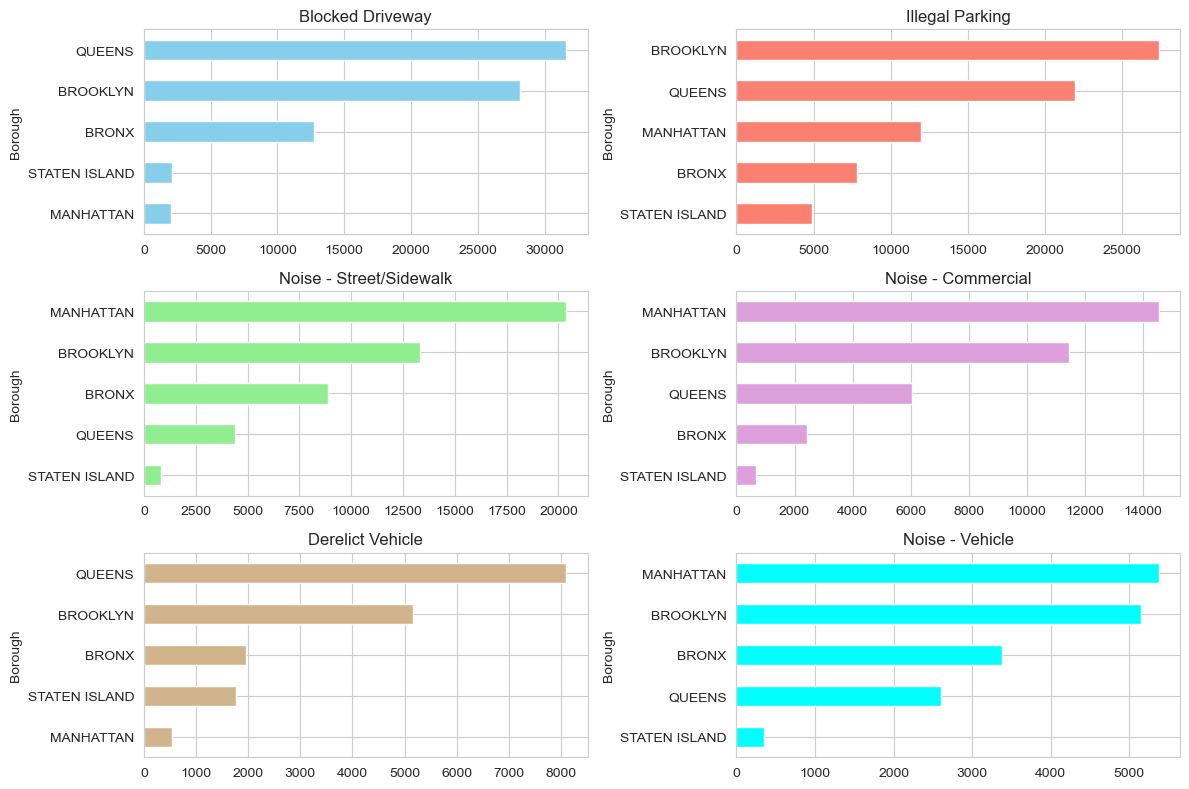

In [38]:
# Set the style of seaborn
sns.set_style("whitegrid")  # This sets the style to 'whitegrid' which adds a grid to the plot background

# Plotting Borough per Complaint Type 
col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number, col_number, figsize=(12, 8))

# Define a list of colors to cycle through, one for each borough if desired
colors = ['skyblue', 'salmon', 'lightgreen', 'plum', 'tan', 'cyan']

for i, (label, col) in enumerate(borough_complaints.items()):
    ax = axes[int(i / col_number), i % col_number]
    col = col.sort_values(ascending=True)[:15]
    # Use the color from the list, and change the kind to 'bar' if horizontal bars are not required
    col.plot(kind='barh', ax=ax, color=colors[i % len(colors)], grid=True)
    ax.set_title(label)

plt.tight_layout()
plt.show()  # This will display the plot if not running in an interactive environment like Jupyter Notebook

In [39]:
dataset['Agency'].value_counts()

Agency
NYPD    291204
Name: count, dtype: int64

<u>ANALYSIS:</u>
    
    - Blocked Driveway is maximum in QUEENS
    - Illegal Parking is maximum in BROOKLYN
    - Noise - Street/Sidewalk is maximum in MANHATTAN
    - Noise - Commercial is maximum in MANHATTAN
    - Derelict Vehicle is maximum in QUEENS
    - Noise - Vehicle is maximum in QUEENS


- Similarly for Complaints per Borough

In [40]:
# similarly for Complaints per Borough
top_borough = dataset['Borough'].value_counts().keys()

complaint_per_borough = dataset.groupby(['Complaint Type', 'Borough']).size().unstack()
complaint_per_borough = complaint_per_borough[top_borough]
complaint_per_borough

Borough,BROOKLYN,QUEENS,MANHATTAN,BRONX,STATEN ISLAND
Complaint Type,,,,,
Animal Abuse,2390,1874,1511,1413,557
Blocked Driveway,28128,31630,2057,12741,2141
Derelict Vehicle,5167,8102,530,1949,1763
Disorderly Youth,72,59,68,63,23
Drinking,257,357,294,188,175
Graffiti,43,37,22,9,2
Illegal Parking,27394,21951,11983,7831,4883
Noise - Commercial,11452,6058,14540,2431,678
Noise - House of Worship,338,299,189,79,17


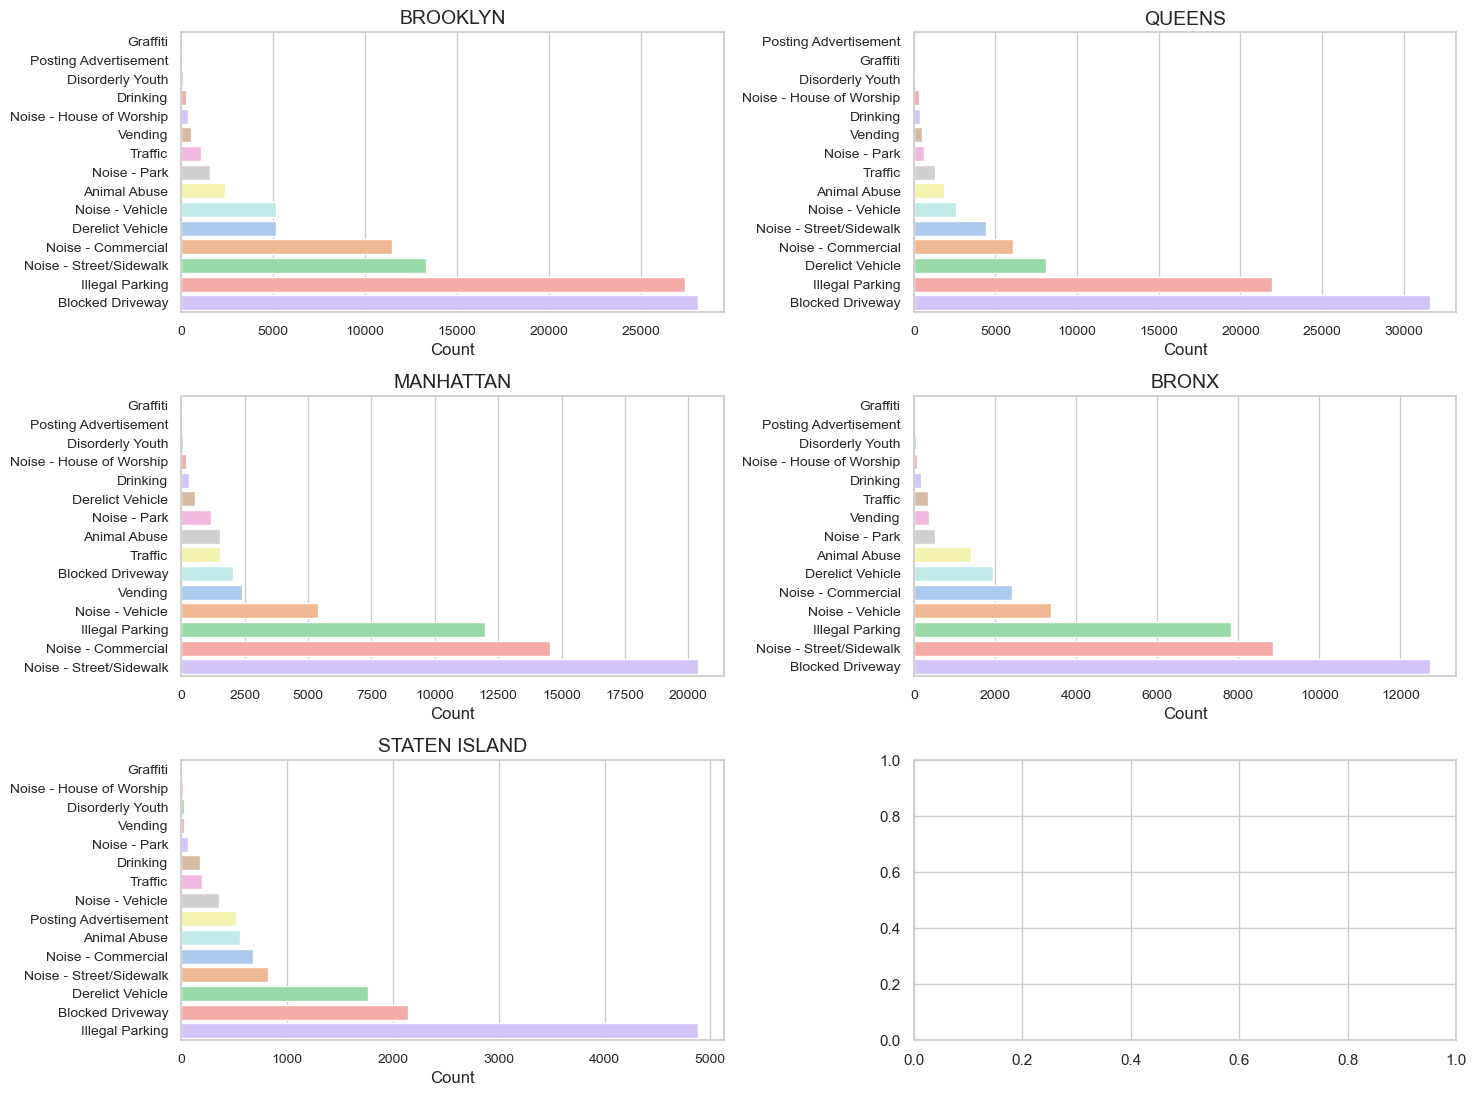

In [41]:
# Set a theme using seaborn
sns.set_theme(context='notebook', style='whitegrid', palette='pastel')

# Define a new layout size and aspect ratio if desired
fig_width = 15
fig_height = 12
fig, axes = plt.subplots(row_number, col_number, figsize=(fig_width, fig_height))

# Use a different palette if you like, this one is 'pastel'
palette = sns.color_palette('pastel', n_colors=15)

for i, (label, col) in enumerate(complaint_per_borough.items()):
    ax = axes[int(i / col_number), i % col_number]
    col = col.sort_values(ascending=True)[:15]
    # Plot with a new color palette and add additional design changes
    sns.barplot(x=col.values, y=col.index, ax=ax, palette=palette)
    ax.set_title(label, fontsize=14)  # Adjust the fontsize if needed
    ax.set_xlabel('Count', fontsize=12)  # Optional, adds label for x-axis
    ax.set_ylabel('')  # Optional, remove y-axis label for a cleaner look
    ax.tick_params(axis='both', which='major', labelsize=10)  # Adjust the size of the ticks

# Adjust the layout for the subplots
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.3, wspace=0.35)

plt.show()  # Display the plots

<u>Observations:</u>

The majority of Blocked Driveway complaints are reported in Brooklyn, Queens, and the Bronx.
Noise - Street/Sidewalk issues are predominantly reported in Manhattan.
Staten Island records the highest number of complaints regarding Illegal Parking.

# 4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

- Our data in Request_Closing_Time has format of days-hour-minute-seconds. Since calculating or operating canbe a tedious process, to make our work easier we first will convert our Request_Closing_Time from days to number of hours. This will make the data calculation or operation easier.
<br><br>
- Since, converting 2:30 hours to timedelta64[h] will give 2 hours, hence we will add 1 and will say that this particular request was closed within 3 hours.
- Then we will find out the mean and standard distribution of the data.

In [42]:
# Creating a column Request_Closing_Time_in_Hours for time in Hours
# and we will say the said complaint has been closed under x hours
dataset['Request_Closing_Time_in_Hours'] = dataset['Request_Closing_Time'].dt.components['hours']+1

# viewing the Two columns side by side for first 20 entries
dataset[['Request_Closing_Time', 'Request_Closing_Time_in_Hours']].head(20)

,Request_Closing_Time,Request_Closing_Time_in_Hours
0,0 days 00:56:00,1
1,0 days 01:27:00,2
2,0 days 04:52:00,5
3,0 days 07:46:00,8
4,0 days 03:28:00,4
5,0 days 01:54:00,2
6,0 days 01:58:00,2
7,0 days 01:48:00,2
8,0 days 08:34:00,9
9,0 days 01:24:00,2


In [46]:
dataset['Request_Closing_Time_in_Minutes'] = dataset['Request_Closing_Time'] / 60

In [43]:
#  Ordering the complaint types based on the average ‘Request_Closing_Time’ in Hours, grouping them for different locations.
data_avg_time_in_hrs = dataset.groupby(['City', 'Complaint Type'])['Request_Closing_Time_in_Hours'].mean()
data_avg_time_in_hrs.head(10)

City     Complaint Type          
ARVERNE  Animal Abuse                2.631579
         Blocked Driveway            3.057143
         Derelict Vehicle            3.407407
         Disorderly Youth            4.000000
         Drinking                    1.000000
         Graffiti                    2.000000
         Illegal Parking             2.827586
         Noise - Commercial          3.000000
         Noise - House of Worship    2.090909
         Noise - Park                1.500000
Name: Request_Closing_Time_in_Hours, dtype: float64

In [44]:
dataset_copy2 = dataset

In [47]:
# Creating a column Request_Closing_Time_in_Seconds for time in seconds
dataset['Request_Closing_Time_in_Seconds'] = dataset['Request_Closing_Time'].astype('timedelta64[s]')

# viewing the Three columns side by side
dataset[['Request_Closing_Time', 'Request_Closing_Time_in_Hours','Request_Closing_Time_in_Seconds','Request_Closing_Time_in_Minutes']].head()

,Request_Closing_Time,Request_Closing_Time_in_Hours,Request_Closing_Time_in_Seconds,Request_Closing_Time_in_Minutes
0,0 days 00:56:00,1,0 days 00:56:00,0 days 00:00:56
1,0 days 01:27:00,2,0 days 01:27:00,0 days 00:01:27
2,0 days 04:52:00,5,0 days 04:52:00,0 days 00:04:52
3,0 days 07:46:00,8,0 days 07:46:00,0 days 00:07:46
4,0 days 03:28:00,4,0 days 03:28:00,0 days 00:03:28


In [48]:
#  Order the complaint types based on the average ‘Request_Closing_Time’ in seconds, grouping them for different locations.
data_avg_in_seconds = dataset.groupby(['City', 'Complaint Type']).Request_Closing_Time_in_Seconds.mean()
data_avg_in_seconds.head(10)

City     Complaint Type          
ARVERNE  Animal Abuse               0 days 02:09:14
         Blocked Driveway           0 days 02:31:37
         Derelict Vehicle           0 days 02:57:57
         Disorderly Youth           0 days 03:35:30
         Drinking                   0 days 00:15:00
         Graffiti                   0 days 01:32:00
         Illegal Parking            0 days 02:19:01
         Noise - Commercial         0 days 02:17:30
         Noise - House of Worship   0 days 01:33:38
         Noise - Park               0 days 01:17:00
Name: Request_Closing_Time_in_Seconds, dtype: timedelta64[s]

- <u>Other analysis works on Time

In [49]:
dataset_copy3 = dataset

In [50]:
# lets analyse the Request_Closing_Time
dataset['Request_Closing_Time'].describe()

count                       291204
mean     0 days 04:18:30.605142786
std      0 days 06:03:42.647544214
min                0 days 00:01:00
25%                0 days 01:16:00
50%                0 days 02:43:00
75%                0 days 05:20:00
max               24 days 16:53:00
Name: Request_Closing_Time, dtype: object

In [51]:
import pandas as pd

# Assuming 'Request_Closing_Time_in_Hours' and 'Request_Closing_Time_in_Seconds'
# are columns in your dataset representing time in hours and seconds as Timedeltas

# Taking the mean and Standard
mean_hrs = dataset['Request_Closing_Time_in_Hours'].mean()
std_hrs = dataset['Request_Closing_Time_in_Hours'].std()

mean_seconds = dataset['Request_Closing_Time_in_Seconds'].mean()
std_seconds = dataset['Request_Closing_Time_in_Seconds'].std()

# Convert Timedelta to seconds for better readability
mean_seconds_in_seconds = mean_seconds.total_seconds()
std_seconds_in_seconds = std_seconds.total_seconds()

# Convert mean_seconds to hours, minutes, and seconds
mean_hours, mean_remainder = divmod(mean_seconds_in_seconds, 3600)
mean_minutes, mean_seconds_remainder = divmod(mean_remainder, 60)

# Convert std_seconds to hours, minutes, and seconds
std_hours, std_remainder = divmod(std_seconds_in_seconds, 3600)
std_minutes, std_seconds_remainder = divmod(std_remainder, 60)

print('The mean hours is {:.2f} hours ({}:{:02d}:{:02d})'.format(mean_hrs, int(mean_hours), int(mean_minutes), int(mean_seconds_remainder)))
print('The standard hours is {:.2f} hours ({}:{:02d}:{:02d})'.format(std_hrs, int(std_hours), int(std_minutes), int(std_seconds_remainder)))


The mean hours is 4.44 hours (4:18:30)
The standard hours is 3.86 hours (6:03:42)


### Examine the Complaint Types column with respect to months, using the information from the Created Date.

In [52]:
# for analysing on the basis of month we will need to separate months from Created Date column
dataset['Year-Month'] = dataset['Created Date'].apply(lambda x:datetime.datetime.strftime(x, '%Y-%m'))


In [53]:
# viewing the months that we have in our dataset
dataset['Year-Month'].unique()

array(['2015-12', '2015-11', '2015-10', '2015-09', '2015-08', '2015-07',
       '2015-06', '2015-05', '2015-04', '2015-03'], dtype=object)

- Looks like we have incident complaints from <b>March</b> to <b>December</b>

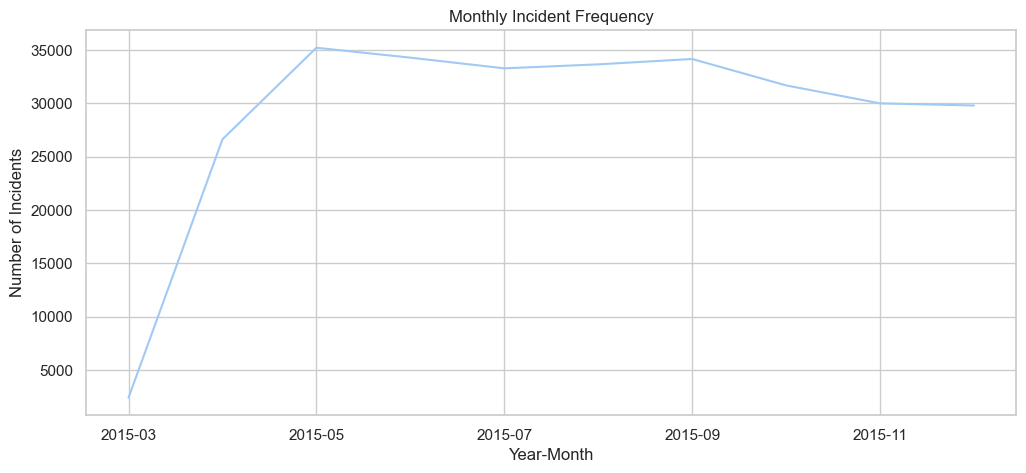

In [54]:
# Generate a line plot to visualize the number of incidents per month
monthly_incidents = dataset.groupby('Year-Month').size().plot(
    figsize=(12, 5),
    title='Monthly Incident Frequency',
    ylabel='Number of Incidents'
)


It appears that there are no complaints recorded for <b>January</b> and <b>February</b>. Maybe the chilly weather keeps everyone indoors and less likely to report issues.
The absence of complaints from <b>January</b> and <b>February</b> in our dataset could be due to their removal as <b>null values</b> in an earlier data cleaning step.

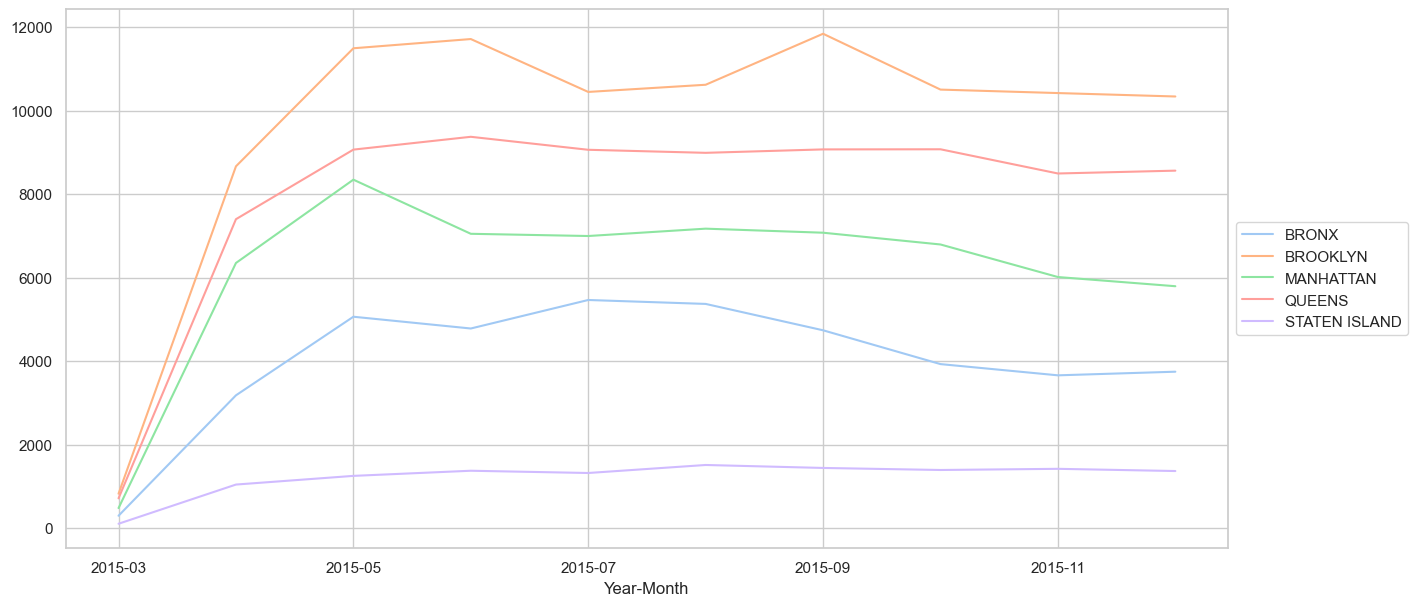

In [55]:
# plotting Borough on the basis of Year-Month
dataset.groupby(['Year-Month','Borough']).size().unstack().plot(figsize=(15,7))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

- <b>BROOKLYN</b> raised most cases all over and most of them were raised in <b>MAY-JUNE</b> and <b>SEPTEMBER</b>.

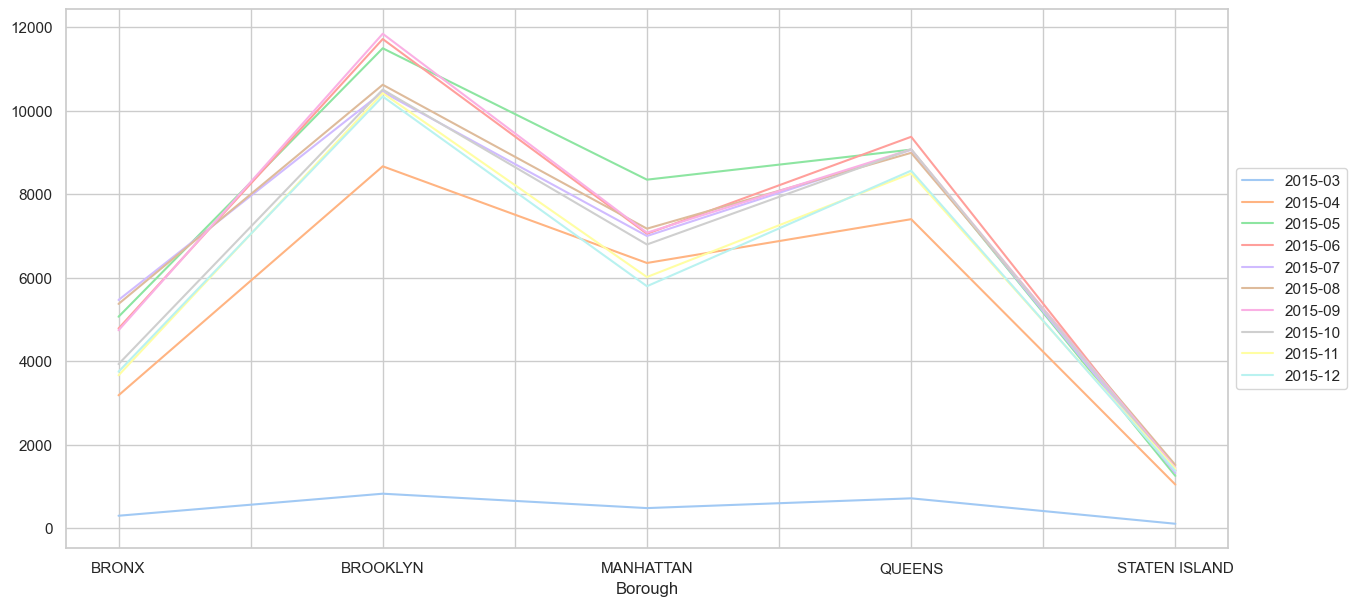

In [56]:
# Plotting Year-Month on the basis of Borough
dataset.groupby(['Borough', 'Year-Month']).size().unstack().plot(figsize=(15,7))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

- <b>DECEMBER</b> has raised least complaints.

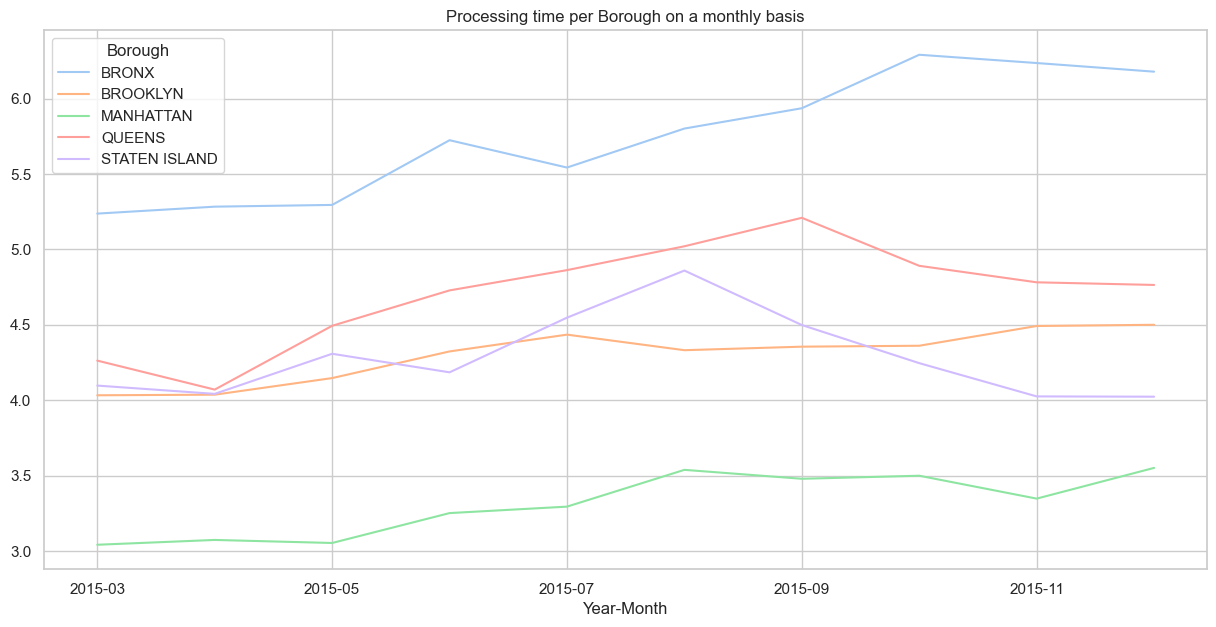

In [57]:
# Processing time per Borough on a monthly basis
dataset.groupby(['Year-Month','Borough'])['Request_Closing_Time_in_Hours'].mean().unstack().plot(figsize=(15,7),
                                                                        title='Processing time per Borough on a monthly basis');

- <b>BRONX</b> has the maximum Processing time every month even though it has the least complaints.


# 5. Perform a statistical test for the following:
### Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.


## a. Whether the average response time across complaint types is similar or not (overall)
## b. Are the type of complaint or service requested and location related?

In [58]:
# viewing the columns
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address',
       'Cross Street 1', 'Cross Street 2', 'City', 'Facility Type', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'Park Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time', 'Request_Closing_Time_in_Hours',
       'Request_Closing_Time_in_Seconds', 'Request_Closing_Time_in_Minutes',
       'Year-Month'],
      dtype='object')

In [59]:
# lets see the average response time in seconds for different complaint types
avg_response_time = dataset.groupby(['Complaint Type']).Request_Closing_Time_in_Seconds.mean().sort_values(ascending=True)
avg_response_time

Complaint Type
Posting Advertisement      0 days 01:58:33
Noise - Commercial         0 days 03:08:12
Noise - House of Worship   0 days 03:11:45
Noise - Park               0 days 03:24:09
Noise - Street/Sidewalk    0 days 03:26:30
Traffic                    0 days 03:27:08
Disorderly Youth           0 days 03:34:06
Noise - Vehicle            0 days 03:35:53
Drinking                   0 days 03:51:23
Vending                    0 days 04:00:42
Illegal Parking            0 days 04:28:59
Blocked Driveway           0 days 04:44:15
Animal Abuse               0 days 05:13:06
Graffiti                   0 days 07:09:04
Derelict Vehicle           0 days 07:20:45
Name: Request_Closing_Time_in_Seconds, dtype: timedelta64[s]

- <b>Null Hypothesis</b> -->>  Average response time across complaint types is similar(overall).
- <b>Alternate Hypothesis</b> -->> Average response time across complaint types is not similar(overall).

-- We can say that for overall case our <b>NULL HYPOTHESIS</b> is rejected as the Average Response Time in Seconds for different complaint types is different

# Testing for our Hypothesis

- Below We conduct ANOVA (Analysis of Variance) test for top 5 type of complaints

- For a 95% of confidence interval we choose our alpha as 0.05 for 5%

- Alpha(0.05) is the critical p-value, if our calculated p-value is less than alpha, it will give us strong evidence to reject Null Hypothesis.
>
- <b>if p < alpha(0.05) <b>: Reject Null Hypothesis, Average response time for all the complaints type is not same.</b>

- <b>if p > alpha(0.05) : Fail to reject Null Hypothesis, Average response time for all the complaints type is same.</b>

In [61]:
# to calculate the p-value log of time taken to close the complaint per complaint is taken
dataset['Request_Closing_Time_in_Seconds'] = pd.to_numeric(dataset['Request_Closing_Time_in_Seconds'], errors='coerce')

data = {}
for complaint in dataset['Complaint Type'].unique():
    data[complaint] = np.log(dataset[dataset['Complaint Type']==complaint]['Request_Closing_Time_in_Seconds'])

In [62]:
data.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth'])

In [63]:
for complaint in data.keys():
    print(data[complaint].std())

1.1036055144551964
0.9759549542464235
1.0776722346194285
1.2581274266775977
1.0893404533708053
1.17535261324468
1.222946234108273
1.076684606971775
1.044094472208652
1.113001283796973
1.18454305254322
1.0462882093103643
1.119379233579716
1.0647868117074388
1.0389882679251103


In [64]:
# importing f_oneway from scipy.stats library
from scipy.stats import f_oneway
# taking top 5 complaints
stat, p = f_oneway(data['Blocked Driveway'], data['Illegal Parking'], data['Noise - Street/Sidewalk'],
                   data['Derelict Vehicle'], data['Noise - Commercial'])
print('Statistics= %.3f, p = %.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('We have Different distributions (reject H0)')

Statistics= 2455.006, p = 0.000
We have Different distributions (reject H0)


- <b>As our p-value is quite low , hence it is being converted to 0.0</b>

- Since our p-value is lower than our critical p-value, we will conclude that we have enough evidence to reject our Null Hypothesis and that is:

- Average response time for all the complaints type is not same.

### For relation between Complaint Type and Location
we will use Crosstab and Chi-square Test

In [65]:
# getting crosstab from pandas
city_type = pd.crosstab(dataset['City'], dataset['Complaint Type'])

In [66]:
# viewing first 5 entries of city_type
city_type.head()

Complaint Type,Animal Abuse,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Posting Advertisement,Traffic,Vending
City,,,,,,,,,,,,,,,
ARVERNE,38,35,27,2,1,1,58,2,11,2,29,7,0,0,1
ASTORIA,125,2618,351,3,35,4,1065,1282,19,61,385,204,1,47,54
Astoria,0,116,12,0,0,0,213,261,0,0,114,0,0,0,0
BAYSIDE,37,376,198,1,1,3,512,40,2,3,15,16,0,9,2
BELLEROSE,7,95,89,2,1,0,106,37,1,1,13,10,1,7,0


In [67]:
# Now we will do Chi-square Test

In [68]:
# contigency table
table = city_type 
# table -->> The contingency table. The table contains the observed frequencies (i.e. number of occurrences) in each category.
# stat -->> chi2 or Test Statistic
# p -->> The p-value of the Test
# dof -->> Degrees of Freedom
# expected -->> The expected frequencies, based on the marginal sums of the table.
stat, p, dof, expected = chi2_contingency(table)

In [69]:
print('The Degrees of Freedom are : {}'. format(dof))
print('The P-Value of the Testing is {}: '.format(p))
print('Expected values : \n')
print(expected)

The Degrees of Freedom are : 728
The P-Value of the Testing is 0.0: 
Expected values : 

[[5.69242764e+00 5.63701007e+01 1.28702518e+01 2.09469577e-01
  9.34160817e-01 8.30528499e-02 5.44172563e+01 2.58331112e+01
  6.77652457e-01 2.88627028e+00 3.50938715e+01 1.23991290e+01
  4.75532689e-01 3.28462997e+00 2.77308321e+00]
 [1.66357208e+02 1.64737668e+03 3.76124088e+02 6.12160157e+00
  2.73001951e+01 2.42716132e+00 1.59030617e+03 7.54954569e+02
  1.98039181e+01 8.43492259e+01 1.02559380e+03 3.62355854e+02
  1.38971095e+01 9.59910085e+01 8.10414131e+01]
 [1.90456925e+01 1.88602767e+02 4.30612164e+01 7.00842137e-01
  3.12551002e+00 2.77877760e-01 1.82068951e+02 8.64322787e+01
  2.26728579e+00 9.65686692e+00 1.17416878e+02 4.14849363e+01
  1.59103461e+00 1.09896965e+01 9.27816626e+00]
 [3.23191569e+01 3.20045198e+02 7.30717568e+01 1.18927821e+00
  5.30376351e+00 4.71538377e-01 3.08957787e+02 1.46669300e+02
  3.84741932e+00 1.63870018e+01 1.99247915e+02 7.03969241e+01
  2.69987018e+00 1.8648

In [71]:
# interpreting test statistics
prob = 0.95 # as aplha is considered 0.05
critical_value = chi2.ppf(prob, dof)
critical_value

791.8799091140163

In [72]:
print('Probability = {}, Critical Value = {}, Test statistic = {}'.format(prob, critical_value, stat))
print()
if abs(stat) >= critical_value:
    print('Dependent (Reject H0 or Null Hypothesis)')
else:
    print('Independent (Failed to reject Null Hypothesis)')


# interpreting the P-Value
alpha = 1 - prob
print('Significance : %.3f, P-Value : %.2f'%(alpha, p))
if p <= alpha:
    print('Dependent (Reject H0 or Null Hypothesis)')
else:
    print('Independent (Failed to reject Null Hypothesis)')

Probability = 0.95, Critical Value = 791.8799091140163, Test statistic = 105437.20019182739

Dependent (Reject H0 or Null Hypothesis)
Significance : 0.050, P-Value : 0.00
Dependent (Reject H0 or Null Hypothesis)


In [73]:
from uszipcode import SearchEngine

def get_county(zip_code):
    search = SearchEngine()
    result = search.by_zipcode(zip_code)

    if result:
        return result.major_city
    else:
        return "City not found"

/Users/prabhakaryadav/anaconda3/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [74]:
#convert zip from float to int

dataset['Incident Zip'] = dataset['Incident Zip'].fillna(0).astype('int64')

# Create a new column 'County' based on the 'ZIP Code' column
dataset['County'] = dataset['Incident Zip'].apply(get_county)

# Display the DataFrame with the new 'County' column
print(dataset)

        Unique Key        Created Date         Closed Date Agency  \
0         32310363 2015-12-31 23:59:00 2016-01-01 00:55:00   NYPD   
1         32309934 2015-12-31 23:59:00 2016-01-01 01:26:00   NYPD   
2         32309159 2015-12-31 23:59:00 2016-01-01 04:51:00   NYPD   
3         32305098 2015-12-31 23:57:00 2016-01-01 07:43:00   NYPD   
4         32306529 2015-12-31 23:56:00 2016-01-01 03:24:00   NYPD   
...            ...                 ...                 ...    ...   
300692    30281370 2015-03-29 00:34:00 2015-03-29 01:13:00   NYPD   
300694    30281230 2015-03-29 00:33:00 2015-03-29 02:33:00   NYPD   
300695    30283424 2015-03-29 00:33:00 2015-03-29 03:40:00   NYPD   
300696    30280004 2015-03-29 00:33:00 2015-03-29 04:38:00   NYPD   
300697    30281825 2015-03-29 00:33:00 2015-03-29 04:41:00   NYPD   

                 Complaint Type                    Descriptor  \
0       Noise - Street/Sidewalk              Loud Music/Party   
1              Blocked Driveway          

In [75]:
pip install uszipcode

Note: you may need to restart the kernel to use updated packages.


In [76]:
# checking the shape of our dataset
dataset_copy4 = dataset

In [ ]:
## dataset['Request_Closing_Time'] = dataset['Request_Closing_Time'].dt.total_seconds() / 60

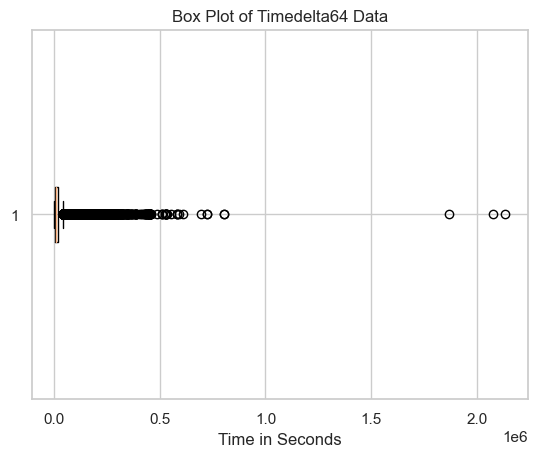

In [77]:
# Create a box plot
plt.boxplot(dataset['Request_Closing_Time_in_Seconds'], vert=False)
plt.xlabel('Time in Seconds')
plt.title('Box Plot of Timedelta64 Data')
plt.show()

In [82]:
dataset['Request_Closing_Time_in_Minutes'].info()

<class 'pandas.core.series.Series'>
Index: 291204 entries, 0 to 300697
Series name: Request_Closing_Time_in_Minutes
Non-Null Count   Dtype          
--------------   -----          
291204 non-null  timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 4.4 MB


In [83]:
# Convert 'Request_Closing_Time_in_Minutes' from timedelta to integer minutes
nanoseconds_in_a_minute = 60 * 1e9  # 60 seconds per minute and 1e9 nanoseconds per second
dataset['Request_Closing_Time_in_Minutes'] = (dataset['Request_Closing_Time_in_Minutes'] / nanoseconds_in_a_minute).astype('int64')


In [85]:
dataset.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Cross Street 1,...,Borough,Park Borough,Latitude,Longitude,Request_Closing_Time,Request_Closing_Time_in_Hours,Request_Closing_Time_in_Seconds,Request_Closing_Time_in_Minutes,Year-Month,County
0,32310363,2015-12-31 23:59:00,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034,71 VERMILYEA AVENUE,ACADEMY STREET,...,MANHATTAN,MANHATTAN,40.865682,-73.923501,0 days 00:56:00,1,3360,0,2015-12,New York
1,32309934,2015-12-31 23:59:00,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105,27-07 23 AVENUE,27 STREET,...,QUEENS,QUEENS,40.775945,-73.915094,0 days 01:27:00,2,5220,1,2015-12,Astoria
2,32309159,2015-12-31 23:59:00,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458,2897 VALENTINE AVENUE,EAST 198 STREET,...,BRONX,BRONX,40.870325,-73.888525,0 days 04:52:00,5,17520,4,2015-12,Bronx
3,32305098,2015-12-31 23:57:00,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461,2940 BAISLEY AVENUE,EDISON AVENUE,...,BRONX,BRONX,40.835994,-73.828379,0 days 07:46:00,8,27960,7,2015-12,Bronx
4,32306529,2015-12-31 23:56:00,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373,87-14 57 ROAD,SEABURY STREET,...,QUEENS,QUEENS,40.733060,-73.874170,0 days 03:28:00,4,12480,3,2015-12,Elmhurst


In [86]:
dataset_copy5 = dataset

In [ ]:
dataset.to_csv('work_save3.csv', index=False)

In [84]:
### Agency and Agency name have same values NYPD
### Unique keys is not significant
### Create date and Closed date is not significant as Request closing time captures this data
### 'Street Name','Cross Street 2' and 'Incident Address' are same as 'Cross Street 1'
### Park Borough same as city, Facility Type is same "Precinct" for all rows

In [87]:

missing_value_columns = ['Agency', 'Agency Name', 'Unique Key', 'Street Name','Cross Street 2','Incident Address','Created Date','Closed Date','Park Borough','Facility Type']

for column in missing_value_columns:
    if column in dataset.columns:
        dataset = dataset.drop(column, axis=1)


In [91]:
# create a new column for improving accoracy considering Random Forest will figure it out correct rules for tree

dataset['City'] = dataset['City'].fillna('')
dataset['Cross Street 1'] = dataset['Cross Street 1'].fillna('')
dataset['City_Street'] = dataset['City'] + ' ' + dataset['Cross Street 1']
dataset['City_Street'] = dataset['City_Street'].str.strip()

In [92]:
dataset.head()

,Complaint Type,Descriptor,Location Type,Incident Zip,Cross Street 1,City,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,Latitude,Longitude,Request_Closing_Time,Request_Closing_Time_in_Hours,Request_Closing_Time_in_Seconds,Request_Closing_Time_in_Minutes,Year-Month,County,City_Street
0,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034,ACADEMY STREET,NEW YORK,1/1/16 7:59,The Police Department responded and upon arriv...,1/1/16 0:55,12 MANHATTAN,MANHATTAN,40.865682,-73.923501,0 days 00:56:00,1,3360,0,2015-12,New York,NEW YORK ACADEMY STREET
1,Blocked Driveway,No Access,Street/Sidewalk,11105,27 STREET,ASTORIA,1/1/16 7:59,The Police Department responded to the complai...,1/1/16 1:26,01 QUEENS,QUEENS,40.775945,-73.915094,0 days 01:27:00,2,5220,1,2015-12,Astoria,ASTORIA 27 STREET
2,Blocked Driveway,No Access,Street/Sidewalk,10458,EAST 198 STREET,BRONX,1/1/16 7:59,The Police Department responded and upon arriv...,1/1/16 4:51,07 BRONX,BRONX,40.870325,-73.888525,0 days 04:52:00,5,17520,4,2015-12,Bronx,BRONX EAST 198 STREET
3,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461,EDISON AVENUE,BRONX,1/1/16 7:57,The Police Department responded to the complai...,1/1/16 7:43,10 BRONX,BRONX,40.835994,-73.828379,0 days 07:46:00,8,27960,7,2015-12,Bronx,BRONX EDISON AVENUE
4,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373,SEABURY STREET,ELMHURST,1/1/16 7:56,The Police Department responded and upon arriv...,1/1/16 3:24,04 QUEENS,QUEENS,40.733060,-73.874170,0 days 03:28:00,4,12480,3,2015-12,Elmhurst,ELMHURST SEABURY STREET


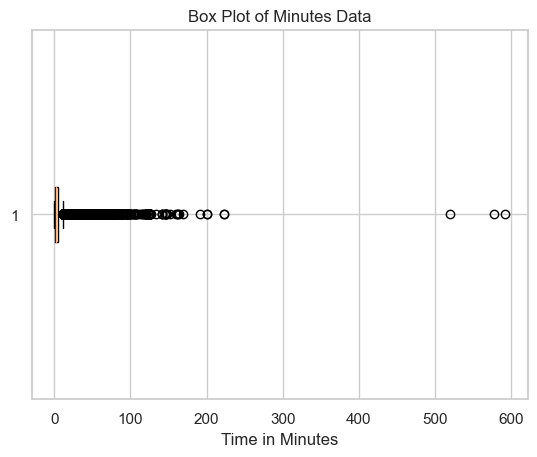

In [93]:
# Create a box plot
plt.boxplot(dataset['Request_Closing_Time_in_Minutes'], vert=False)
plt.xlabel('Time in Minutes')
plt.title('Box Plot of Minutes Data')
plt.show()

In [95]:
### Remove outliers if time 
mins_greater_500 = len(dataset[dataset['Request_Closing_Time_in_Minutes'] > 199])
print(mins_greater_500)

7


In [96]:
dataset = dataset[dataset['Request_Closing_Time_in_Minutes']< 200]

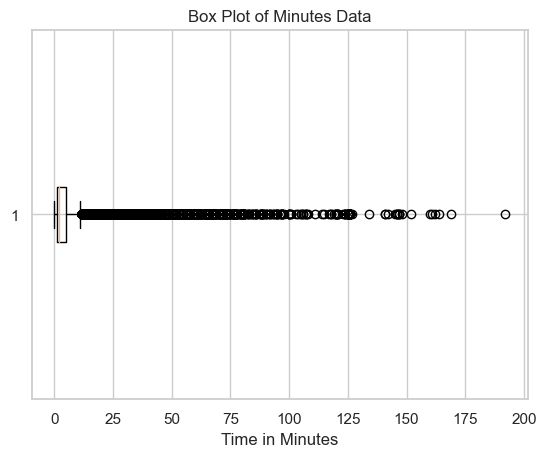

In [97]:
# Create a box plot
plt.boxplot(dataset['Request_Closing_Time_in_Minutes'], vert=False)
plt.xlabel('Time in Minutes')
plt.title('Box Plot of Minutes Data')
plt.show()

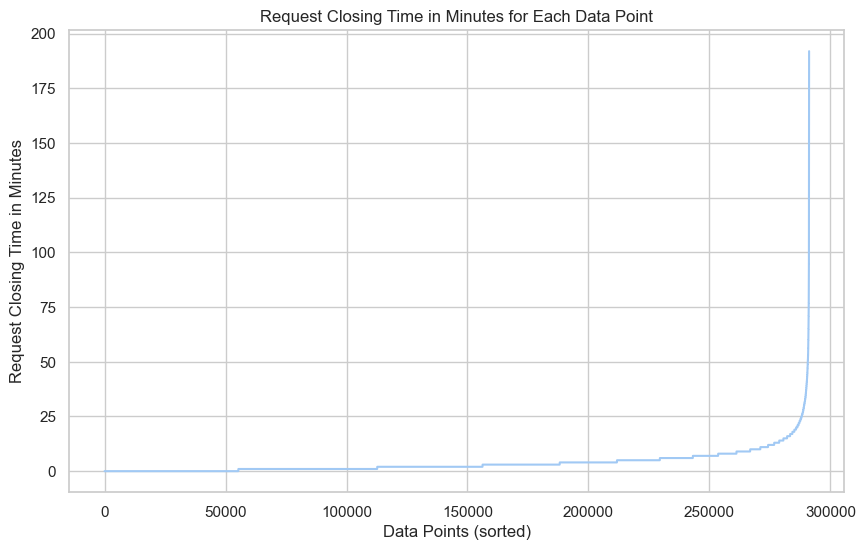

In [98]:
import matplotlib.pyplot as plt

# Sort the 'Request_Closing_Time_in_Minutes' column
sorted_times = dataset['Request_Closing_Time_in_Minutes'].sort_values()

# Create an x-axis as a range from 0 to the number of points
x_axis = range(len(sorted_times))

# Plot the sorted times
plt.figure(figsize=(10, 6))
plt.plot(x_axis, sorted_times)
plt.xlabel('Data Points (sorted)')
plt.ylabel('Request Closing Time in Minutes')
plt.title('Request Closing Time in Minutes for Each Data Point')
plt.show()


In [100]:
dataset.head()

,Complaint Type,Descriptor,Location Type,Incident Zip,Cross Street 1,City,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,Latitude,Longitude,Request_Closing_Time,Request_Closing_Time_in_Hours,Request_Closing_Time_in_Seconds,Request_Closing_Time_in_Minutes,Year-Month,County,City_Street
0,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034,ACADEMY STREET,NEW YORK,1/1/16 7:59,The Police Department responded and upon arriv...,1/1/16 0:55,12 MANHATTAN,MANHATTAN,40.865682,-73.923501,0 days 00:56:00,1,3360,0,2015-12,New York,NEW YORK ACADEMY STREET
1,Blocked Driveway,No Access,Street/Sidewalk,11105,27 STREET,ASTORIA,1/1/16 7:59,The Police Department responded to the complai...,1/1/16 1:26,01 QUEENS,QUEENS,40.775945,-73.915094,0 days 01:27:00,2,5220,1,2015-12,Astoria,ASTORIA 27 STREET
2,Blocked Driveway,No Access,Street/Sidewalk,10458,EAST 198 STREET,BRONX,1/1/16 7:59,The Police Department responded and upon arriv...,1/1/16 4:51,07 BRONX,BRONX,40.870325,-73.888525,0 days 04:52:00,5,17520,4,2015-12,Bronx,BRONX EAST 198 STREET
3,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461,EDISON AVENUE,BRONX,1/1/16 7:57,The Police Department responded to the complai...,1/1/16 7:43,10 BRONX,BRONX,40.835994,-73.828379,0 days 07:46:00,8,27960,7,2015-12,Bronx,BRONX EDISON AVENUE
4,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373,SEABURY STREET,ELMHURST,1/1/16 7:56,The Police Department responded and upon arriv...,1/1/16 3:24,04 QUEENS,QUEENS,40.733060,-73.874170,0 days 03:28:00,4,12480,3,2015-12,Elmhurst,ELMHURST SEABURY STREET


In [99]:
df = dataset

In [ ]:
df.info()

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Label Encoding for categorical columns
le = LabelEncoder()
categorical_columns = ['Complaint Type', 'Descriptor','Resolution Description', 'Location Type', 'City',
                       'Community Board', 'Borough', 'County', 'City_Street', 'Cross Street 1']

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Exclude columns not relevant for modeling
exclude_columns = ['Due Date' , 'Resolution Action Updated Date', 'Year-Month' , 'Latitude','Longitude','Request_Closing_Time','Request_Closing_Time_in_Hours','Request_Closing_Time_in_Seconds']
X = df.drop(exclude_columns + ['Request_Closing_Time_in_Minutes'], axis=1)
y = df['Request_Closing_Time_in_Minutes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=200, random_state=30),
    'LinearRegression': LinearRegression(),
    'SVR': SVR(kernel='linear')
}

# Results dictionary
results = {}

# Common preprocessor for all models except SVR
common_preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(include=['int64', 'float64']).columns)
    ])

# Loop through models
for model_name, model in models.items():
    # Adjust preprocessor for SVR
    if model_name == 'SVR':
        preprocessor = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ])
    else:
        preprocessor = common_preprocessor

    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[model_name] = {'MSE': mse, 'MAE': mae, 'R2 Score': r2}

# Display results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    print()


Model: RandomForestRegressor
  MSE: 30.593564129262614
  MAE: 3.096240335751981
  R2 Score: 0.05169758073191577

Model: GradientBoostingRegressor
  MSE: 27.025369622692878
  MAE: 2.9414327436857843
  R2 Score: 0.1623001724633789

Model: LinearRegression
  MSE: 30.96509804031161
  MAE: 3.197658342519402
  R2 Score: 0.04018122045433381

Model: SVR
  MSE: 33.45495131305887
  MAE: 2.9303594268079416
  R2 Score: -0.03699624968914539



In [102]:
df2 = dataset
df2['Request_Closing_Time_Log'] = np.log1p(df2['Request_Closing_Time_in_Minutes'])

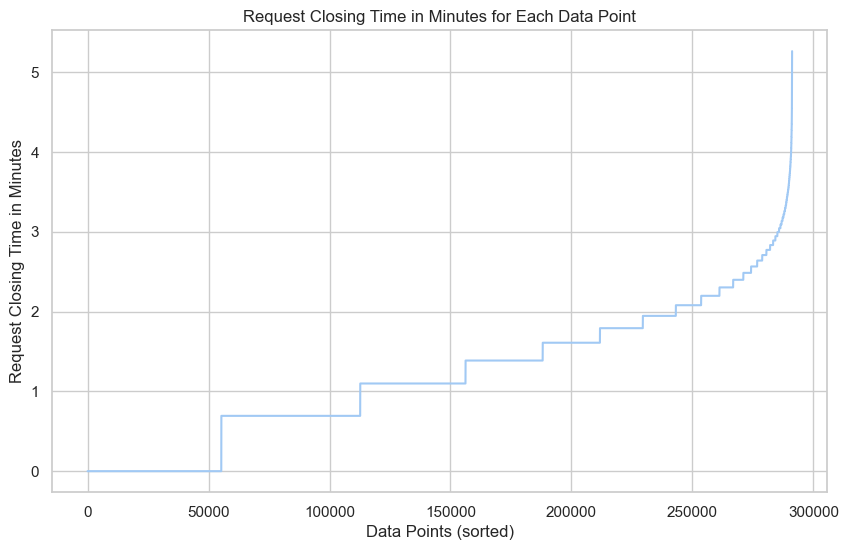

In [105]:

# Sort the 'Request_Closing_Time_in_Minutes' column
sorted_times = df2['Request_Closing_Time_Log'].sort_values()

# Create an x-axis as a range from 0 to the number of points
x_axis = range(len(sorted_times))

# Plot the sorted times
plt.figure(figsize=(10, 6))
plt.plot(x_axis, sorted_times)
plt.xlabel('Data Points (sorted)')
plt.ylabel('Request Closing Time in Minutes')
plt.title('Request Closing Time in Minutes for Each Data Point')
plt.show()


In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Load your dataset
# df2 = pd.read_csv('your_dataset.csv')

# Label Encoding for categorical columns
le = LabelEncoder()
categorical_columns = ['Complaint Type', 'Descriptor','Resolution Description', 'Location Type', 'City',
                       'Community Board', 'Borough', 'County', 'City_Street', 'Cross Street 1']

for col in categorical_columns:
    df2[col] = le.fit_transform(df2[col])

# Exclude columns not relevant for modeling
exclude_columns = ['Due Date' , 'Resolution Action Updated Date', 'Year-Month' , 'Latitude','Longitude','Request_Closing_Time','Request_Closing_Time_in_Hours','Request_Closing_Time_in_Seconds']
X = df2.drop(exclude_columns + ['Request_Closing_Time_in_Minutes'], axis=1)
y = df2['Request_Closing_Time_in_Minutes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=200, random_state=30),
    'LinearRegression': LinearRegression(),
    'SVR': SVR(kernel='linear')
}

# Results dictionary
results = {}

# Common preprocessor for all models except SVR
common_preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(include=['int64', 'float64']).columns)
    ])

# Loop through models
for model_name, model in models.items():
    # Adjust preprocessor for SVR
    if model_name == 'SVR':
        preprocessor = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ])
    else:
        preprocessor = common_preprocessor

    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[model_name] = {'MSE': mse, 'MAE': mae, 'R2 Score': r2}

# Display results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    print()


Model: RandomForestRegressor
  MSE: 0.0023145123626373667
  MAE: 0.0004955357142857153
  R2 Score: 0.9999282575360086

Model: GradientBoostingRegressor
  MSE: 0.0019145768878346921
  MAE: 0.002064078785910494
  R2 Score: 0.9999406542537203

Model: LinearRegression
  MSE: 11.841980687216592
  MAE: 1.8265652391453044
  R2 Score: 0.6329365585792539

Model: SVR
  MSE: 14.96177355916508
  MAE: 1.3126509084801183
  R2 Score: 0.536232980153938



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [ ]:
# Load your dataset (assuming it's in a variable df)
# df = pd.read_csv('your_dataset.csv')



# Convert categorical columns to numerical using Label Encoding
le = LabelEncoder()
df['Complaint Type'] = le.fit_transform(df['Complaint Type'])
df['Descriptor'] = le.fit_transform(df['Descriptor'])
df['Location Type'] = le.fit_transform(df['Location Type'])
df['City'] = le.fit_transform(df['City'])
df['Community Board'] = le.fit_transform(df['Community Board'])
df['Borough'] = le.fit_transform(df['Borough'])
df['County'] = le.fit_transform(df['County'])
df['City_Street'] = le.fit_transform(df['City_Street'])
df['Cross Street 1'] = le.fit_transform(df['Cross Street 1'])   


In [ ]:


# Extract features and target variable
X = df.drop('Request_Closing_Time', axis=1)
y = df['Request_Closing_Time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a preprocessing pipeline
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Create a RandomForestRegressor model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Mean Squared Error: 16268.85603932245 before transformation of target


In [ ]:
y.describe()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor  # Change here
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load your dataset (assuming it's in a variable df)
# df = pd.read_csv('your_dataset.csv')

# Drop unnecessary columns for prediction


# Convert categorical columns to numerical using Label Encoding
le = LabelEncoder()
df['Complaint Type'] = le.fit_transform(df['Complaint Type'])
df['Descriptor'] = le.fit_transform(df['Descriptor'])
df['Location Type'] = le.fit_transform(df['Location Type'])
df['City'] = le.fit_transform(df['City'])
df['Facility Type'] = le.fit_transform(df['Facility Type'])
df['Community Board'] = le.fit_transform(df['Community Board'])
df['Borough'] = le.fit_transform(df['Borough'])
df['Park Borough'] = le.fit_transform(df['Park Borough'])
df['County'] = le.fit_transform(df['County'])

# Extract features and target variable
X = df.drop('Request_Closing_Time', axis=1)
y = df['Request_Closing_Time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a preprocessing pipeline
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Create a GradientBoostingRegressor model  # Change here
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=200, random_state=30))  # Change here
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# Mean Squared Error: 14289.800442969117
# Mean Squared Error: 0.49207649320377556

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Change here
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load your dataset (assuming it's in a variable df)
# df = pd.read_csv('your_dataset.csv')

# Drop unnecessary columns for prediction


# Convert categorical columns to numerical using Label Encoding
le = LabelEncoder()
df['Complaint Type'] = le.fit_transform(df['Complaint Type'])
df['Descriptor'] = le.fit_transform(df['Descriptor'])
df['Location Type'] = le.fit_transform(df['Location Type'])
df['City'] = le.fit_transform(df['City'])
df['Facility Type'] = le.fit_transform(df['Facility Type'])
df['Community Board'] = le.fit_transform(df['Community Board'])
df['Borough'] = le.fit_transform(df['Borough'])
df['Park Borough'] = le.fit_transform(df['Park Borough'])
df['County'] = le.fit_transform(df['County'])

# Extract features and target variable
X = df.drop('Request_Closing_Time', axis=1)
y = df['Request_Closing_Time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a preprocessing pipeline
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Create a LinearRegression model  # Change here
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Change here
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# Mean Squared Error: 15135.410718292533

In [ ]:
df.info()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load your dataset (assuming it's in a variable df)
# df = pd.read_csv('your_dataset.csv')

# Drop unnecessary columns for prediction

# Convert categorical columns to numerical using Label Encoding
le = LabelEncoder()
df['Complaint Type'] = le.fit_transform(df['Complaint Type'])
df['Descriptor'] = le.fit_transform(df['Descriptor'])
df['Location Type'] = le.fit_transform(df['Location Type'])
df['City'] = le.fit_transform(df['City'])
df['Facility Type'] = le.fit_transform(df['Facility Type'])
df['Community Board'] = le.fit_transform(df['Community Board'])
df['Borough'] = le.fit_transform(df['Borough'])
df['Park Borough'] = le.fit_transform(df['Park Borough'])
df['County'] = le.fit_transform(df['County'])

# Extract features and target variable
X = df.drop('Request_Closing_Time', axis=1)
y = df['Request_Closing_Time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a preprocessing pipeline
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())  # Adding standard scaling for SVR
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Create an SVR model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='linear'))  # You can choose different kernels like 'linear', 'rbf', etc.
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# Mean Squared Error: 16056.230090792966

In [ ]:
y.describe()

In [ ]:
df.head()

In [ ]:
# complaint types
dataset['Complaint Type'].value_counts()

In [ ]:
dataset['Request_Closing_Time_Log'] = np.log1p(dataset['Request_Closing_Time'])

# Plot the histogram of the transformed variable
plt.hist(dataset['Request_Closing_Time_Log'], bins=30, edgecolor='black')
plt.title('Log-Transformed Request_Closing_Time Histogram')
plt.xlabel('Log(Request_Closing_Time)')
plt.ylabel('Count')
plt.show()

In [ ]:
# Create subplots for Latitude and Longitude
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(dataset['Latitude'], bins=30)
plt.title('Latitude Distribution')

plt.subplot(1, 2, 2)
plt.hist(dataset['Longitude'], bins=30)
plt.title('Longitude Distribution')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.patches as mpatches
boroughs = list(dataset['Borough'].value_counts().index)
colors = ['#9b59b6', '#3498db', '#95a5a6', '#e74c3c', '#34495e', '#2ecc71']
patches = []

fig, ax = plt.subplots(figsize = (6, 6))

for index, value in enumerate(boroughs):
    borough_df = dataset[dataset['Borough'] == value]
    ax.scatter(dataset['Longitude'], dataset['Latitude'], c = colors[index], s = 0.5, alpha = 0.01, marker = '.')
    patches.append(mpatches.Patch(label = value, color = colors[index]))
 
borough_map['geometry'].boundary.plot(edgecolor = 'black', linewidth = 0.2, ax = ax)

plt.title("Distribution of complaints", size = 13)
plt.xlabel('Longitude', size = 12)
plt.ylabel('Latitude', size = 12)
plt.legend(patches, boroughs);

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your data into a DataFrame named 'data'

# Select the categorical features for one-hot encoding
categorical_features = dataset[[ 'Complaint Type', 'Descriptor', 'Resolution Description', 'Borough']]
# 'Agency'
# Perform one-hot encoding
# 'Agency',
encoded_data = pd.get_dummies(dataset, columns=[ 'Complaint Type', 'Descriptor', 'Resolution Description', 'Borough'])

# Calculate the correlation matrix
correlation_matrix = encoded_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap with One-Hot Encoding')
plt.show()


In [ ]:
# Creating a column Request_Closing_Time_in_Hours for time in Hours
# and we will say the said complaint has been closed under x hours
dataset['Request_Closing_Time_in_Hours'] = dataset['Request_Closing_Time'].dt.components['hours']+1

# viewing the Two columns side by side for first 20 entries
dataset[['Request_Closing_Time', 'Request_Closing_Time_in_Hours']].head(20)

# --------------------------------------------------------------------------------------------------------------